In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd
import os
from sklearn.utils import check_random_state

In [9]:
# Generating artifical data
n = 50
XX = np.arange(n)
# If seed is None, return the RandomState singleton used by np.random. 
# If seed is an int, return a new RandomState instance seeded with seed. 
# If seed is already a RandomState instance, return it. Otherwise raise ValueError.
rs = check_random_state(0)
YY = rs.randint(-10,  10, size=(n,)) + 2.0 * XX
data = np.stack([XX, YY], axis=1)
print(data)
print(data.shape)

[[ 0.  2.]
 [ 1.  7.]
 [ 2. -6.]
 [ 3. -1.]
 [ 4.  1.]
 [ 5.  7.]
 [ 6. 11.]
 [ 7. 23.]
 [ 8. 24.]
 [ 9. 12.]
 [10. 16.]
 [11. 24.]
 [12. 15.]
 [13. 22.]
 [14. 25.]
 [15. 34.]
 [16. 39.]
 [17. 29.]
 [18. 39.]
 [19. 36.]
 [20. 39.]
 [21. 51.]
 [22. 50.]
 [23. 55.]
 [24. 43.]
 [25. 55.]
 [26. 57.]
 [27. 44.]
 [28. 64.]
 [29. 51.]
 [30. 67.]
 [31. 71.]
 [32. 73.]
 [33. 75.]
 [34. 72.]
 [35. 67.]
 [36. 62.]
 [37. 65.]
 [38. 75.]
 [39. 68.]
 [40. 80.]
 [41. 75.]
 [42. 85.]
 [43. 94.]
 [44. 80.]
 [45. 80.]
 [46. 82.]
 [47. 88.]
 [48. 91.]
 [49. 94.]]
(50, 2)


In [10]:
#######################
# Defining flags
#######################

num_epochs = 50

In [11]:
# Creating the weight and bias
# The defined variables will be initialized to zero
W = tf.Variable(0.0, name="weights")
b = tf.Variable(0.0, name="bias")

In [17]:
#######################
# Necessary functions
#######################

# Creating placeholders for input X and label Y
def inputs():
    """
    Defining the place_holders.
    :return: Returning the data and label place holders.
    """
    X = tf.placeholder(tf.float32, name="X")
    Y = tf.placeholder(tf.float32, name="Y")
    
    return X, Y


# Create the prediction
def inference(X):
    """
    Forward passing the X
    :param X: Input
    :return: X*W + b
    """
    return X*W + b


def loss(X, Y):
    """
    Compute the loadd by comparing the predicted value to the actual label.
    :param X: The input
    :param Y: The input
    :return: The loss over the samples.
    """
    
    # Making the prediction
    Y_predicted = inference(X)
    return tf.reduce_sum(tf.squared_difference(Y, Y_predicted)) / (2 * data.shape[0])


# The training function
def train(loss):
    learning_rate = 0.0001
    return tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [19]:
with tf.Session() as sess:
    # Initialized the variables[w and b].
    sess.run(tf.global_variables_initializer())
    
    # Get the input tensors
    X, Y = inputs()
    
    # Return the train loss and create the train_op
    train_loss = loss(X, Y)
    train_op = train(train_loss)
    
    # Step 8: train the model
    for epoch_num in range(num_epochs):
        loss_value, _ = sess.run([train_loss, train_op], feed_dict={X:data[:, 0], Y: data[:, 1]})
        # Displaying the loss per epoch
        print('epoch %d, loss=%f' % (epoch_num + 1, loss_value))
        # Save the values of weight and bias
        wcoeff, bias = sess.run([W, b])
        

epoch 1, loss=1573.599976
epoch 2, loss=1332.513916
epoch 3, loss=1128.868286
epoch 4, loss=956.848938
epoch 5, loss=811.544128
epoch 6, loss=688.804993
epoch 7, loss=585.127380
epoch 8, loss=497.550781
epoch 9, loss=423.574829
epoch 10, loss=361.087402
epoch 11, loss=308.304138
epoch 12, loss=263.718170
epoch 13, loss=226.056366
epoch 14, loss=194.243408
epoch 15, loss=167.371048
epoch 16, loss=144.671936
epoch 17, loss=125.497986
epoch 18, loss=109.301773
epoch 19, loss=95.620834
epoch 20, loss=84.064507
epoch 21, loss=74.302887
epoch 22, loss=66.057228
epoch 23, loss=59.092148
epoch 24, loss=53.208714
epoch 25, loss=48.238998
epoch 26, loss=44.041073
epoch 27, loss=40.495071
epoch 28, loss=37.499771
epoch 29, loss=34.969639
epoch 30, loss=32.832428
epoch 31, loss=31.027143
epoch 32, loss=29.502193
epoch 33, loss=28.214087
epoch 34, loss=27.126015
epoch 35, loss=26.206921
epoch 36, loss=25.430567
epoch 37, loss=24.774773
epoch 38, loss=24.220825
epoch 39, loss=23.752903
epoch 40, los

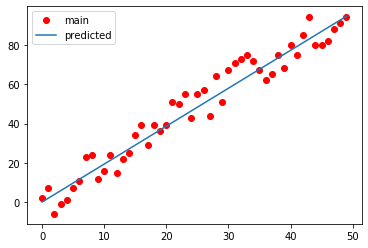

In [22]:
###############################
# Evaluate and plot
###############################
input_values = data[:, 0]
labels = data[:, 1]
prediction_values = data[:, 0] * wcoeff + bias

plt.plot(input_values, labels, 'ro', label='main')
plt.plot(input_values, prediction_values, label='predicted')

plt.legend()
plt.show()
plt.close()

In [ ]:
# numpy.stack(array, axis=0,out=None)
# Join a sequence of arrays along a new axis
# The axis parameter specifies the index of the new axis in the dimensions of the result.
# For example, if axis=0 it will be the first dimension and if axis=-1 it will be the last dimension.

In [25]:
arrays = [np.random.randn(3, 4) for _ in range(10)]
print(np.stack(arrays, axis=0).shape)
print(np.stack(arrays, axis=1).shape)
print(np.stack(arrays, axis=2).shape)
# print(np.stack(arrays, axis=3).shape)

(10, 3, 4)
(3, 10, 4)
(3, 4, 10)


AxisError: axis 3 is out of bounds for array of dimension 3

In [26]:
a = np.array([1, 2, 3])
b = np.array([2, 3, 4])
np.stack((a, b))

array([[1, 2, 3],
       [2, 3, 4]])

In [27]:
np.stack((a, b), axis=-1)

array([[1, 2],
       [2, 3],
       [3, 4]])

In [32]:
# Implement without tensorflow
import math
simulations = 1000

def loss(real_y, predicted_y, samples):
    s = 0
    for i in range(samples):
        s += math.square(real_y[i]-predicted_y[i]) 
        
    return s / (2 * samples)

In [31]:
def predicate(theta0, theta1, x):
    return theta0 + x * theta1

In [35]:
learning_rate = 0.0001
theta0, theta1 = 0, 0
data_x, data_y = data[:, 0], data[:, 1]
samples = len(data_x)
_m = samples;

for k in range(simulations):
    predicted_y = []
    for i in range(samples):
        temp0 = theta0 - learning_rate * 1 / _m * (predicate(theta0, theta1, _m[i]) - data_y[i])
        temp1 = theta1 - learning_rate * 1 / _m * (predicate(theta0, theta1, _m[i]) - data_y[i]) * _m[i]
        theta0, theta1 = temp0, temp1
        predicted_y.append(theta0 + theta1 * _m[i])
    
    losses = loss(data_y, predicted_y, _m)
    print('epoch = ', k + 1, 'loss = ', loss)

TypeError: 'int' object is not subscriptable

In [29]:
print(data[:, 0])

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49.]


In [30]:
a, b = [1, 2, 3], len(a)
a, b

([1, 2, 3], 3)